
# Housing Price Prediction for Surprice Housing Co.

## Step1
Import all librarires and read the training dataset given in CSV format

In [ ]:

import pandas as pd
import numpy as np
# Visualization methods(used during EDA)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings("ignore")
# -----------------------------
# Loading data
# -----------------------------
df = pd.read_csv("train.csv")
# viewing basic structure of data
df.head()
df.shape        # Number of rows and columns
df.info()       # Data types and missing values


## Step 2. Understanding the data set. EDA
This is the foundational step before any model building to perform EDA on the dataset and understand the predictors and analyse them 
Identifying numeric variables gives insight into the statistics and helps in feature scaling , performing correlation analysis

--Highly multicollinear variables are as:-
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


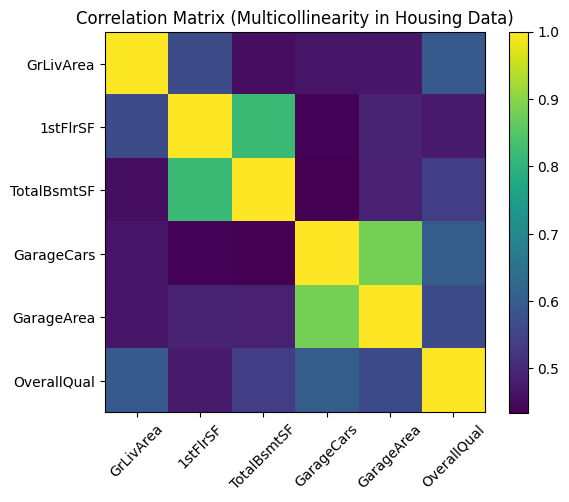

In [36]:
#Analyze Numeric variables to visually understand multicollinearity in data
#Identify numeric variables
num_df = df.select_dtypes(include=["int64", "float64"])
num_df.columns
print("--Highly multicollinear variables are as:-")
corr_with_target = num_df.corr()["SalePrice"].sort_values(ascending=False)
print(corr_with_target.head(10))

# Select strongly related numeric variables
cols = [
    "GrLivArea", "1stFlrSF", "TotalBsmtSF",
    "GarageCars", "GarageArea", "OverallQual"
]

corr = df[cols].corr()

plt.figure(figsize=(6,5))
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(cols)), cols, rotation=45)
plt.yticks(range(len(cols)), cols)
plt.title("Correlation Matrix (Multicollinearity in Housing Data)")
plt.tight_layout()
plt.show()


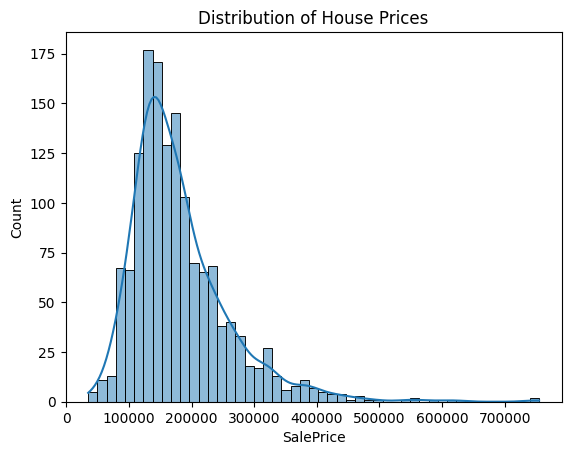

In [29]:

# Analyze target variable: SalePrice
sns.histplot(df["SalePrice"], kde=True)
plt.title("Distribution of House Prices")
plt.show()

# Separate predictors and target
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]


## Step3. One-hot encoding . Data Preparation
Converting categorical variables to numeric form required for linear regression models

In [ ]:

# -----------------------------
# Convert categorical variables into numeric using one-hot encoding
# drop_first=True avoids dummy variable trap
X = pd.get_dummies(X, drop_first=True)


## Step4. Train - Test Split
Ensures model performance is reliable for future properties

In [ ]:

# -----------------------------
# Split data into training and testing sets; prevents overfitting 
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


## Step5. Handle Missing Values
Impute missing values using median which works well for skewed housing data
Business impact: Allows our model to function even when the data is incomplete

In [ ]:
# -----------------------------
# Missing value handling: Using method SimpleImputer to achieve this
# -----------------------------
imputer = SimpleImputer(strategy="median")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


## Step6. Feature Scaling
Very important step and this eradicates baised penalties

In [ ]:

# -----------------------------
#Business impact- prevents larger valued variable like 'area' from dominating the result
# -----------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


##Step7. Ridge Regression

In [ ]:

# -----------------------------
# Ridge Regression with cross-validation; Ridge helps in scenarios where many correlated predictors exist
# We want stability rather than feature elimination
# -----------------------------
ridge = Ridge()
ridge_params = {"alpha": np.logspace(-3, 3, 50)}

ridge_cv = GridSearchCV(
    ridge,
    ridge_params,
    cv=5,
    scoring="neg_root_mean_squared_error"
)
ridge_cv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
       9.54095476e-03, 1.26485522e-02, 1.67683294e-02, 2.22299648e-02,
       2.94705170e-02, 3.90693994e-02, 5.17947468e-02, 6.86648845e-02,
       9.10298178e-02, 1.20679264e-01, 1.59985872e-01, 2....
       2.68269580e+00, 3.55648031e+00, 4.71486636e+00, 6.25055193e+00,
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03])},
             scoring='neg_root_mean_squared_error')

##Step8. Lasso Regression
Lasso helps when we want feature selection

In [ ]:

# -----------------------------
# Lasso Regression with cross-validation. 
# -----------------------------
lasso = Lasso(max_iter=5000)
lasso_params = {"alpha": np.logspace(-3, 1, 50)}

lasso_cv = GridSearchCV(
    lasso,
    lasso_params,
    cv=5,
    scoring="neg_root_mean_squared_error"
)
lasso_cv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Lasso(max_iter=5000),
             param_grid={'alpha': array([1.00000000e-03, 1.20679264e-03, 1.45634848e-03, 1.75751062e-03,
       2.12095089e-03, 2.55954792e-03, 3.08884360e-03, 3.72759372e-03,
       4.49843267e-03, 5.42867544e-03, 6.55128557e-03, 7.90604321e-03,
       9.54095476e-03, 1.15139540e-02, 1.38949549e-02, 1.67683294e-02,
       2.02358965e-02, 2.44205309e-02, 2.94...
       1.93069773e-01, 2.32995181e-01, 2.81176870e-01, 3.39322177e-01,
       4.09491506e-01, 4.94171336e-01, 5.96362332e-01, 7.19685673e-01,
       8.68511374e-01, 1.04811313e+00, 1.26485522e+00, 1.52641797e+00,
       1.84206997e+00, 2.22299648e+00, 2.68269580e+00, 3.23745754e+00,
       3.90693994e+00, 4.71486636e+00, 5.68986603e+00, 6.86648845e+00,
       8.28642773e+00, 1.00000000e+01])},
             scoring='neg_root_mean_squared_error')

## Step9. Final step: Model Evaluation
In this method we will generate prediction after both models are trained
The evaluation function will compute R² and RMSE on the test dataset to assess the generalisation performance of the model. 
R² measures the proportion of variance explained by the model, while RMSE quantifies the average prediction error in actual price units. 
These metrics together provide a proper assessment of both explanatory power and predictive accuracy.

In [ ]:

# -----------------------------
# Creating Model Evaluation function
# -----------------------------
def evaluate(model):
    y_pred = model.predict(X_test) #predict house prices for unseen data
    return {
        "R2": r2_score(y_test, y_pred),  #Higher this score higher the better
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)) #Lower this score is better
    }
best_lasso=lasso_cv.best_estimator_
#evaluate performance of both regression models
ridge_result = evaluate(ridge_cv.best_estimator_)
lasso_result = evaluate(lasso_cv.best_estimator_)
print("-----Best Ridge Alpha-------")
print(ridge_cv.best_params_)
print("Ridge Performance:", ridge_result)

print("------Best Lasso Alpha----------") 
print(lasso_cv.best_params_)
print("Lasso Performance:", lasso_result)


-----Best Ridge Alpha-------
{'alpha': np.float64(568.9866029018293)}
Ridge Performance: {'R2': 0.8559755671492719, 'RMSE': np.float64(31701.98726102968)}
------Best Lasso Alpha----------
{'alpha': np.float64(10.0)}
Lasso Performance: {'R2': 0.7598639745356568, 'RMSE': np.float64(40935.21346065629)}
